# <center>Upgrad Capstone</center>
#### <center>`Project facilitator: Prashant Bhide`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`Project partner: Anilkumar Narayanam`</center>

# Initial Subtasks

In [1]:
# Importing the required libraries

import os, warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Global configurations

os.environ['PROJ_LIB'] = os.path.join(os.environ['CONDA_PREFIX'], 'Library', 'share')

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.2f}'.format)
pd.options.display.max_colwidth = 100

sns.set(context='notebook', style='darkgrid', font_scale=1.4)

%matplotlib inline
plt.rcParams['font.size'] = '14'

***

## Subtask 1 - Reading Data

### Reading the [non_event_data] or device_brand dataset from S3

In [3]:
# Read initial 10 rows to get an idea of the dataset

#filename = 's3://upgrad-capstone-mlc/mid-submission/non_event_data.csv'
filename = 'D:/Prashant/Upgrad/Capstone/S3data/non_event_data.csv'
df_device_brand = pd.read_csv(filename, header=None, nrows=10)

display(df_device_brand)
df_device_brand.info()

,0,1,2,3,4,5
0,-1819925713085810000,F,23,F0-24,OPPO,N1 Mini
1,3670076507269740000,M,33,M32+,Meizu,menote1 2
2,5333872006968810000,M,34,M32+,Xiaomi,xnote
3,4216041491117040000,M,60,M32+,lshi,ihv1
4,-3441149835823130000,M,30,M25-32,Huawei,è£è€€ç•…çŽ©5X
5,600258969813393000,M,42,M32+,Meizu,é­…è“2
6,4823428704448060000,M,47,M32+,Huawei,hu1 Plus
7,4383614216971680000,M,39,M32+,samsung,Galaxy Premier
8,4794091972520650000,M,20,M0-24,OPPO,R7s
9,-6880965893023640000,M,45,M32+,Xiaomi,MI 2A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10 non-null     int64 
 1   1       10 non-null     object
 2   2       10 non-null     int64 
 3   3       10 non-null     object
 4   4       10 non-null     object
 5   5       10 non-null     object
dtypes: int64(2), object(4)
memory usage: 608.0+ bytes


In [4]:
%%time
# Now we will read the entire dataset with the right column names and dtypes
# We wil also ignore the 'group_train' column since that will be derived from the age column later

df_device_brand = pd.read_csv(filename, header=None,
        names=['device_id', 'gender', 'age', 'group_train', 'phone_brand', 'device_model'],
        usecols=['device_id', 'gender', 'age', 'phone_brand', 'device_model'],
        dtype={'device_id':np.str, 'age':np.int8})

display(df_device_brand)
df_device_brand.info()

,device_id,gender,age,phone_brand,device_model
0,-1819925713085810000,F,23,OPPO,N1 Mini
1,3670076507269740000,M,33,Meizu,menote1 2
2,5333872006968810000,M,34,Xiaomi,xnote
3,4216041491117040000,M,60,lshi,ihv1
4,-3441149835823130000,M,30,Huawei,è£è€€ç•…çŽ©5X
...,...,...,...,...,...
74640,-4160161164750850000,M,60,Huawei,hu1
74641,-3193846941368640000,M,40,OPPO,Find 7
74642,7976299855247220000,F,29,Huawei,B199
74643,-8665947049306800000,M,28,Xiaomi,MI 2S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74645 non-null  object
 1   gender        74645 non-null  object
 2   age           74645 non-null  int8  
 3   phone_brand   74645 non-null  object
 4   device_model  74645 non-null  object
dtypes: int8(1), object(4)
memory usage: 2.3+ MB
Wall time: 158 ms


### Reading the [event_data] dataset from S3

In [5]:
# Read initial 10 rows to get an idea of the dataset

#filename = 's3://upgrad-capstone-mlc/mid-submission/event_data.csv'
filename = 'D:/Prashant/Upgrad/Capstone/S3data/event_data.csv'
df_events = pd.read_csv(filename, header=None, nrows=10)

display(df_events)
df_events.info()

,0,1,2,3,4,5,6,7
0,-1000369272589010000,F,26,F25-32,\N,\N,\N,\N
1,-1000572055892390000,F,27,F25-32,\N,\N,\N,\N
2,-1000643208750510000,M,29,M25-32,\N,\N,\N,\N
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24.0,119.61,29.7
4,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14.0,120.29,30.42
5,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42.0,120.3,30.41
6,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32.0,119.69,29.8
7,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56.0,119.69,29.8
8,-1001337759327040000,M,30,M25-32,3085771,2016-05-07 08:41:42.0,119.62,29.72
9,-1001337759327040000,M,30,M25-32,3021685,2016-05-04 10:09:49.0,120.3,30.41


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10 non-null     int64 
 1   1       10 non-null     object
 2   2       10 non-null     int64 
 3   3       10 non-null     object
 4   4       10 non-null     object
 5   5       10 non-null     object
 6   6       10 non-null     object
 7   7       10 non-null     object
dtypes: int64(2), object(6)
memory usage: 768.0+ bytes


In [6]:
%%time
# Now we will read the entire dataset with the right column names and dtypes, along with specifying the null values
# We wil also ignore the 'group_train' column since that will be derived from the age column later

df_events = pd.read_csv(filename, header=None, na_values='\\N', parse_dates=['event_time'],
        names=['device_id', 'gender', 'age', 'group_train', 'event_id', 'event_time', 'longitude', 'latitude'],
        usecols=['device_id', 'gender', 'age', 'event_id', 'event_time', 'longitude', 'latitude'],
        dtype={'device_id':np.str, 'age':np.int8, 'event_id':np.str, 'longitude':np.float, 'latitude':np.float})

display(df_events)
df_events.info()

,device_id,gender,age,event_id,event_time,longitude,latitude
0,-1000369272589010000,F,26,NaN,NaT,nan,nan
1,-1000572055892390000,F,27,NaN,NaT,nan,nan
2,-1000643208750510000,M,29,NaN,NaT,nan,nan
3,-1001337759327040000,M,30,2774404,2016-05-07 09:14:24,119.61,29.70
4,-1001337759327040000,M,30,3065018,2016-05-04 10:26:14,120.29,30.42
...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,839154,2016-05-07 08:33:32,0.00,0.00
1266929,99976251796408100,M,43,2642482,2016-05-07 08:25:59,0.00,0.00
1266930,99976251796408100,M,43,2642573,2016-05-07 08:32:57,0.00,0.00
1266931,999861742187156000,M,27,NaN,NaT,nan,nan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266933 entries, 0 to 1266932
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   device_id   1266933 non-null  object        
 1   gender      1266933 non-null  object        
 2   age         1266933 non-null  int8          
 3   event_id    1215598 non-null  object        
 4   event_time  1215598 non-null  datetime64[ns]
 5   longitude   1215598 non-null  float64       
 6   latitude    1215598 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int8(1), object(3)
memory usage: 59.2+ MB
Wall time: 3.37 s


### Reading the [app_data] dataset from S3

In [7]:
%%time
# app_data is split across 5 files in S3 due to its huge size
# Read initial 10 rows from the '000000_0' file to get an idea of the dataset

#filename = 's3://upgrad-capstone-mlc/mid-submission/app_data/000000_0'
filename = 'D:/Prashant/Upgrad/Capstone/S3data/app_data/000000_0'
df_app_data_0 = pd.read_csv(filename, header=None, nrows=10)

display(df_app_data_0)
df_app_data_0.info()

,0,1,2,3,4,5
0,3231904,-1000044012126765960,1,0,810,Casual puzzle categories
1,3231904,-1000044012126765960,1,0,405,Custom label
2,3231904,-1000044012126765960,1,0,795,game
3,3069897,-1000044012126765960,1,0,810,Casual puzzle categories
4,3069897,-1000044012126765960,1,0,405,Custom label
5,3069897,-1000044012126765960,1,0,795,game
6,3247259,-1000044012126765960,1,0,810,Casual puzzle categories
7,3247259,-1000044012126765960,1,0,405,Custom label
8,3247259,-1000044012126765960,1,0,795,game
9,3074032,-1000044012126765960,1,0,810,Casual puzzle categories


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10 non-null     int64 
 1   1       10 non-null     int64 
 2   2       10 non-null     int64 
 3   3       10 non-null     int64 
 4   4       10 non-null     int64 
 5   5       10 non-null     object
dtypes: int64(5), object(1)
memory usage: 608.0+ bytes
Wall time: 35 ms


In [8]:
%%time
# Now we will read the entire dataset with the right column names and dtypes, 
# along with specifying the null values and ignoring any error/bad lines
# We wil also ignore the 'is_installed' (no data variation) and 'label_id' (is represented by 'category') columns

df_app_data_0 = pd.read_csv(filename, header=None, na_values='\\N', quoting=3, error_bad_lines=False,
        names=['event_id', 'app_id', 'is_installed', 'is_active', 'label_id', 'category'],
        usecols=['event_id', 'app_id', 'is_active', 'category'],
        dtype={'event_id':np.str, 'app_id':np.str, 'is_active':np.int8, 'category':np.str})

display(df_app_data_0)
df_app_data_0.info()

,event_id,app_id,is_active,category
0,3231904,-1000044012126765960,0,Casual puzzle categories
1,3231904,-1000044012126765960,0,Custom label
2,3231904,-1000044012126765960,0,game
3,3069897,-1000044012126765960,0,Casual puzzle categories
4,3069897,-1000044012126765960,0,Custom label
...,...,...,...,...
43576739,679260,979841249782513929,0,pursue
43576740,467860,979841249782513929,0,pursue
43576741,742984,979841249782513929,0,pursue
43576742,560652,979841249782513929,0,pursue


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43576744 entries, 0 to 43576743
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   event_id   object
 1   app_id     object
 2   is_active  int8  
 3   category   object
dtypes: int8(1), object(3)
memory usage: 1.0+ GB
Wall time: 33.3 s


In [9]:
%%time
# We will keep app_data rows with event_id's that are present in the event_data dataset and discard the rest

df_app_data_0 = df_app_data_0[df_app_data_0.event_id.isin(df_events.event_id)]
print('df_app_data_0.shape after discarding unwanted data =', df_app_data_0.shape)
df_app_data_0.info()

df_app_data_0.shape after discarding unwanted data = (16475609, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16475609 entries, 3 to 43576743
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   event_id   object
 1   app_id     object
 2   is_active  int8  
 3   category   object
dtypes: int8(1), object(3)
memory usage: 518.5+ MB
Wall time: 11.2 s


In [10]:
%%time
# We will similarly read and process the other 4 files

#filename = 's3://upgrad-capstone-mlc/mid-submission/app_data/000001_0'
filename = 'D:/Prashant/Upgrad/Capstone/S3data/app_data/000001_0'
df_app_data_1 = pd.read_csv(filename, header=None, na_values='\\N', quoting=3, error_bad_lines=False,
        names=['event_id', 'app_id', 'is_installed', 'is_active', 'label_id', 'category'],
        usecols=['event_id', 'app_id', 'is_active', 'category'],
        dtype={'event_id':np.str, 'app_id':np.str, 'is_active':np.int8, 'category':np.str})

print('df_app_data_1.shape at initial read =', df_app_data_1.shape)
df_app_data_1 = df_app_data_1[df_app_data_1.event_id.isin(df_events.event_id)]
print('df_app_data_1.shape after discarding unwanted data =', df_app_data_1.shape)
df_app_data_1.info()

df_app_data_1.shape at initial read = (34910994, 4)
df_app_data_1.shape after discarding unwanted data = (13181207, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13181207 entries, 0 to 34910992
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   event_id   object
 1   app_id     object
 2   is_active  int8  
 3   category   object
dtypes: int8(1), object(3)
memory usage: 414.8+ MB
Wall time: 46 s


In [11]:
%%time
#filename = 's3://upgrad-capstone-mlc/mid-submission/app_data/000002_0'
filename = 'D:/Prashant/Upgrad/Capstone/S3data/app_data/000002_0'
df_app_data_2 = pd.read_csv(filename, header=None, na_values='\\N', quoting=3, error_bad_lines=False,
        names=['event_id', 'app_id', 'is_installed', 'is_active', 'label_id', 'category'],
        usecols=['event_id', 'app_id', 'is_active', 'category'],
        dtype={'event_id':np.str, 'app_id':np.str, 'is_active':np.int8, 'category':np.str})

print('df_app_data_2.shape at initial read =', df_app_data_2.shape)
df_app_data_2 = df_app_data_2[df_app_data_2.event_id.isin(df_events.event_id)]
print('df_app_data_2.shape after discarding unwanted data =', df_app_data_2.shape)
df_app_data_2.info()

df_app_data_2.shape at initial read = (38201608, 4)
df_app_data_2.shape after discarding unwanted data = (14385443, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14385443 entries, 6 to 38201606
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   event_id   object
 1   app_id     object
 2   is_active  int8  
 3   category   object
dtypes: int8(1), object(3)
memory usage: 452.7+ MB
Wall time: 40.3 s


In [12]:
%%time
#filename = 's3://upgrad-capstone-mlc/mid-submission/app_data/000003_0'
filename = 'D:/Prashant/Upgrad/Capstone/S3data/app_data/000003_0'
df_app_data_3 = pd.read_csv(filename, header=None, na_values='\\N', quoting=3, error_bad_lines=False,
        names=['event_id', 'app_id', 'is_installed', 'is_active', 'label_id', 'category'],
        usecols=['event_id', 'app_id', 'is_active', 'category'],
        dtype={'event_id':np.str, 'app_id':np.str, 'is_active':np.int8, 'category':np.str})

print('df_app_data_3.shape at initial read =', df_app_data_3.shape)
df_app_data_3 = df_app_data_3[df_app_data_3.event_id.isin(df_events.event_id)]
print('df_app_data_3.shape after discarding unwanted data =', df_app_data_3.shape)
df_app_data_3.info()

df_app_data_3.shape at initial read = (39690060, 4)
df_app_data_3.shape after discarding unwanted data = (14859220, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14859220 entries, 0 to 39690051
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   event_id   object
 1   app_id     object
 2   is_active  int8  
 3   category   object
dtypes: int8(1), object(3)
memory usage: 467.6+ MB
Wall time: 42.8 s


In [13]:
%%time
#filename = 's3://upgrad-capstone-mlc/mid-submission/app_data/000004_0'
filename = 'D:/Prashant/Upgrad/Capstone/S3data/app_data/000004_0'
df_app_data_4 = pd.read_csv(filename, header=None, na_values='\\N', quoting=3, error_bad_lines=False,
        names=['event_id', 'app_id', 'is_installed', 'is_active', 'label_id', 'category'],
        usecols=['event_id', 'app_id', 'is_active', 'category'],
        dtype={'event_id':np.str, 'app_id':np.str, 'is_active':np.int8, 'category':np.str})

print('df_app_data_4.shape at initial read =', df_app_data_4.shape)
df_app_data_4 = df_app_data_4[df_app_data_4.event_id.isin(df_events.event_id)]
print('df_app_data_4.shape after discarding unwanted data =', df_app_data_4.shape)
df_app_data_4.info()

df_app_data_4.shape at initial read = (52976304, 4)
df_app_data_4.shape after discarding unwanted data = (19943135, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19943135 entries, 9 to 52976301
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   event_id   object
 1   app_id     object
 2   is_active  int8  
 3   category   object
dtypes: int8(1), object(3)
memory usage: 627.6+ MB
Wall time: 1min 7s


In [14]:
%%time
# We will now concatenate the 5 datasets into a master dataset and delete the individual datasets

df_app_data = pd.concat([df_app_data_0, df_app_data_1], axis=0, ignore_index=True, copy=False)
print('df_app_data.shape after concatinating #0 and #1 datasets =', df_app_data.shape)
del df_app_data_0, df_app_data_1
df_app_data.info()

df_app_data.shape after concatinating #0 and #1 datasets = (29656816, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29656816 entries, 0 to 29656815
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   event_id   object
 1   app_id     object
 2   is_active  int8  
 3   category   object
dtypes: int8(1), object(3)
memory usage: 707.1+ MB
Wall time: 4.41 s


In [15]:
%%time
df_app_data = pd.concat([df_app_data, df_app_data_2], axis=0, ignore_index=True, copy=False)
print('df_app_data.shape after concatinating #0, #1, #2 datasets =', df_app_data.shape)
del df_app_data_2

df_app_data = pd.concat([df_app_data, df_app_data_3], axis=0, ignore_index=True, copy=False)
print('df_app_data.shape after concatinating #0, #1, #2, #3 datasets =', df_app_data.shape)
del df_app_data_3

df_app_data = pd.concat([df_app_data, df_app_data_4], axis=0, ignore_index=True, copy=False)
print('df_app_data.shape after concatinating #0, #1, #2, #3, #4 datasets =', df_app_data.shape)
del df_app_data_4

df_app_data.shape after concatinating #0, #1, #2 datasets = (44042259, 4)
df_app_data.shape after concatinating #0, #1, #2, #3 datasets = (58901479, 4)
df_app_data.shape after concatinating #0, #1, #2, #3, #4 datasets = (78844614, 4)
Wall time: 27.6 s


In [16]:
df_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78844614 entries, 0 to 78844613
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   event_id   object
 1   app_id     object
 2   is_active  int8  
 3   category   object
dtypes: int8(1), object(3)
memory usage: 1.8+ GB


***

## Subtask 2 - Cleaning Data

### Cleaning Geospatial Data (Lat and Long)

In [17]:
# We will check the summary stats of the events dataset

df_events.describe()

,age,longitude,latitude
count,1266933.00,1215598.00,1215598.00
mean,33.40,78.39,21.83
std,9.76,53.81,15.65
min,1.00,-180.00,-33.80
25%,26.00,0.00,0.00
50%,31.00,112.75,28.57
75%,39.00,117.17,34.01
max,96.00,151.18,53.64


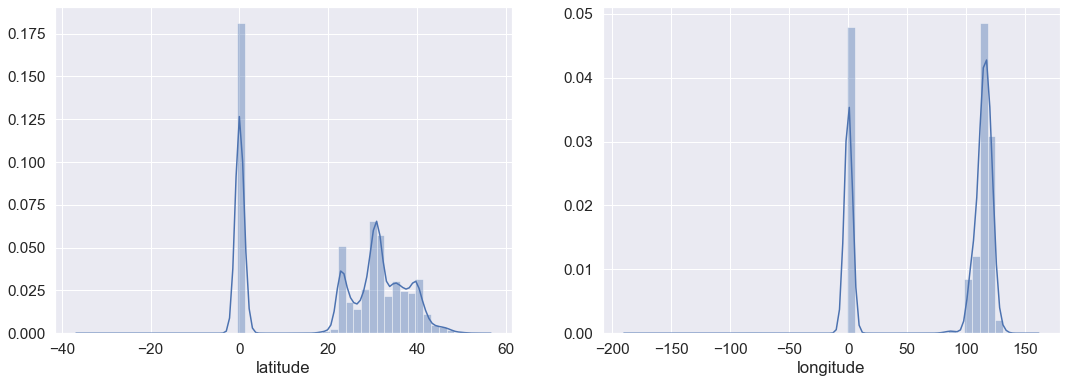

In [18]:
# We will check the distribution plots of the latitude and longitude values

plt.figure(figsize=(18,6));
plt.subplot(1,2,1);
sns.distplot(df_events.latitude);
plt.subplot(1,2,2);
sns.distplot(df_events.longitude);
plt.show();

In [19]:
# From the summary stats and distribution plots, we see a significant number of latitude and longitude values
# fall around zero and need to be cleaned up along with other negative value outliers

df_events['latitude'] = df_events['latitude'].apply(lambda x: x if x > 10.0 else np.nan)
df_events['longitude'] = df_events['longitude'].apply(lambda x: x if x > 80.0 else np.nan)

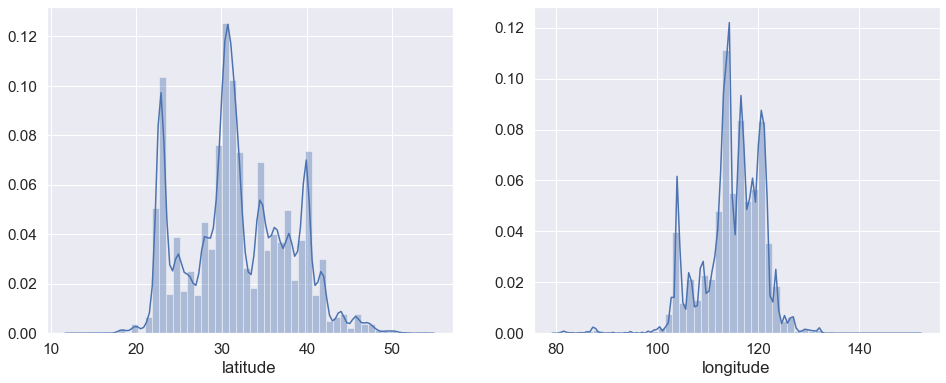

In [20]:
# we will now re-plot the distributions after the data cleanup

plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
sns.distplot(df_events.latitude);
plt.subplot(1,2,2);
sns.distplot(df_events.longitude);
plt.show();

In [21]:
# We will re-check the summary stats of the events dataset after the data cleanup

df_events.describe()

,age,longitude,latitude
count,1266933.00,829133.00,829658.00
mean,33.40,114.94,31.95
std,9.76,5.92,6.02
min,1.00,80.26,12.96
25%,26.00,112.54,28.01
50%,31.00,115.27,31.27
75%,39.00,119.33,36.46
max,96.00,151.18,53.64


### Other Data Cleaning required

In [22]:
# We will check the missing values percentage in all the datasets

display(df_device_brand.isna().sum() * 100 / df_device_brand.shape[0])
display('-' * 20)
display(df_events.isna().sum() * 100 / df_events.shape[0])

device_id      0.00
gender         0.00
age            0.00
phone_brand    0.00
device_model   0.00
dtype: float64

'--------------------'

device_id     0.00
gender        0.00
age           0.00
event_id      4.05
event_time    4.05
longitude    34.56
latitude     34.51
dtype: float64

___We can see that the device_brand dataset has no missing values and does not require any immediate cleanup.<br><br>However, the events dataset shows 4.05% of event_id's are missing, and roughly 34.5% of the latitude and longitude values have been set to null during the earlier Geospatial cleanup. These null values will be handled as part of the subsequent EDA & Advanced Visualization subtasks.___

***

## Subtask 3 - Basic EDA and Visualization and Feature Engineering

### Basic EDA and Visualization tasks

#### 1.	Plot appropriate graphs representing the distribution of age and gender in the data set [univariate]

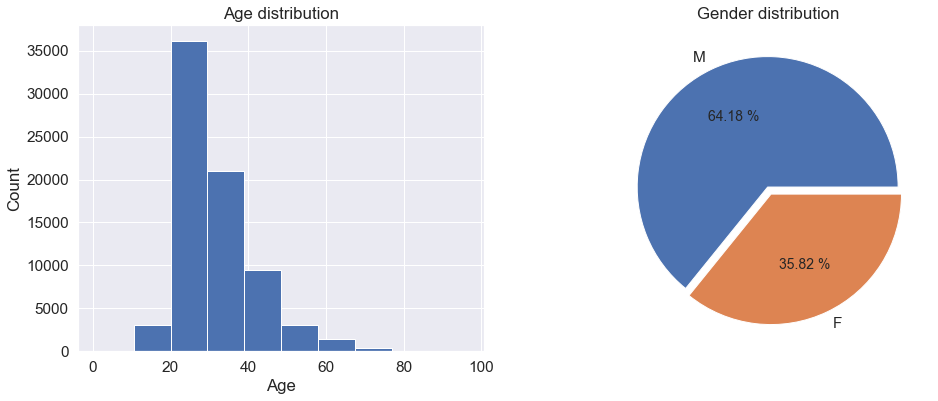

In [23]:
# We will use the device_brand dataset for plotting the age and gender distributions

plt.rcParams['font.size'] = '14';
plt.figure(figsize=(16,6));

plt.subplot(1,2,1);
plt.hist(df_device_brand.age);
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')

plt.subplot(1,2,2);
gender_counts = df_device_brand.gender.value_counts()
plt.pie(x=gender_counts, explode=[0.01,0.05], labels=gender_counts.index, autopct='%1.2f %%')
plt.title('Gender distribution')

plt.show();
del gender_counts

___From the Age distribution we can see that the dominant ranges are 20-30 & 30-40 years with much lower counts in the extreme ranges. From the Gender distribution we see a dominance of Males at 64% compared to Females at 36%.___

#### 2.	Boxplot analysis for gender and age [bivariate]

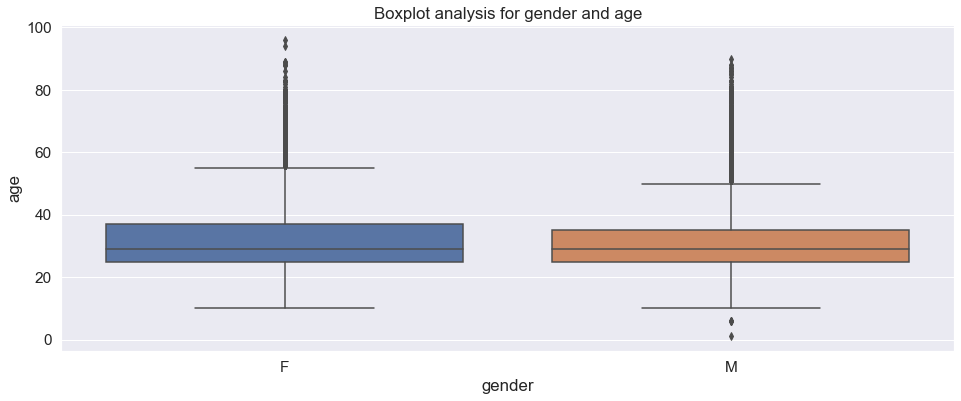

In [24]:
# We will use the device_brand dataset for plotting the gender and age boxplot distribution

plt.figure(figsize=(16,6));
plt.title('Boxplot analysis for gender and age');
sns.boxplot(x='gender', y='age', data=df_device_brand);
plt.show();

___From the Boxplot distribution, we can see that the Female and Male Age distributions are very similar around the lower quartile and median ranges. However, the Female age distribution is higher compared to Male for the upper quartile and outliers beyond that, while the Male distribution shows a few outliers under the lower quartile.___

#### 3. Plot the percentage of the device_ids with and without event data

In [25]:
# We will first calculate the percentages of the device_ids with and without event data

total_unique_device_ids = len(df_events.device_id.unique())
unique_device_ids_without_events = len(df_events[df_events.event_id.isna()].device_id.unique())
unique_device_ids_with_events = (total_unique_device_ids - unique_device_ids_without_events)
print('total_unique_device_ids =', total_unique_device_ids)
print('unique_device_ids_without_events =', unique_device_ids_without_events)
print('unique_device_ids_with_events =', unique_device_ids_with_events)

null_event_data_pct = round(df_events.event_id.isna().sum() * 100 / df_events.shape[0], 2)
non_null_event_data_pct = round(100.0 - null_event_data_pct, 2)
print('null_event_data_pct =', null_event_data_pct)
print('non_null_event_data_pct =', non_null_event_data_pct)

total_unique_device_ids = 74645
unique_device_ids_without_events = 51335
unique_device_ids_with_events = 23310
null_event_data_pct = 4.05
non_null_event_data_pct = 95.95


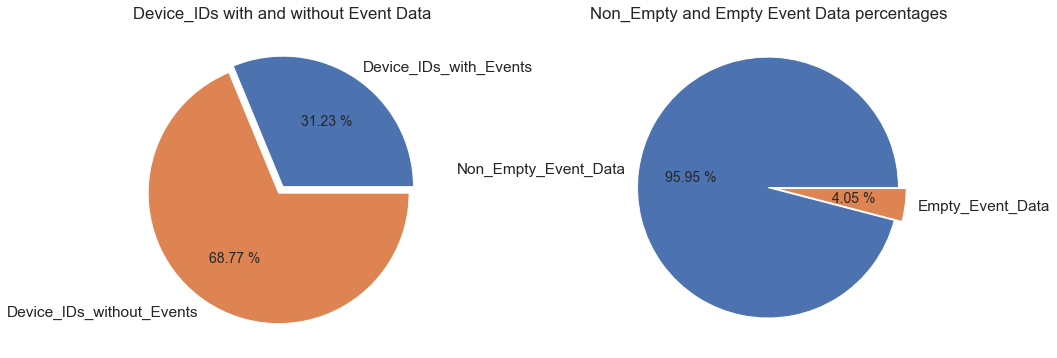

In [26]:
# And then plot them as separate pie charts

plt.figure(figsize=(16,6));

plt.subplot(1,2,1);
device_counts = [unique_device_ids_with_events, unique_device_ids_without_events]
plt.pie(x=device_counts, explode=[0.01,0.05],
        labels=['Device_IDs_with_Events','Device_IDs_without_Events'], autopct='%1.2f %%');
plt.title('Device_IDs with and without Event Data');

plt.subplot(1,2,2);
event_pcts = [non_null_event_data_pct, null_event_data_pct]
plt.pie(x=event_pcts, explode=[0.01,0.05],
        labels=['Non_Empty_Event_Data','Empty_Event_Data'], autopct='%1.2f %%')
plt.title('Non_Empty and Empty Event Data percentages');

plt.show();
del total_unique_device_ids, unique_device_ids_without_events, unique_device_ids_with_events
del device_counts, null_event_data_pct, non_null_event_data_pct, event_pcts

___We can see that only 31% of the Device_IDs have event data. However, this event data makes up close to 96% of the df_events size with the null events making up just 4% of the dataset size.___

#### 4.	Plot a graph representing the distribution of events over different days of a week

In [27]:
# We will first derive new features 'hour' and 'dayofweek' from event_time

df_events['hour'] = df_events['event_time'].dt.hour
df_events['dayofweek'] = df_events['event_time'].apply(
    lambda x: np.nan if pd.isnull(x) else str(int(x.dayofweek)+1) + '-' + str(x.day_name())[:3])
df_events

,device_id,gender,age,event_id,event_time,longitude,latitude,hour,dayofweek
0,-1000369272589010000,F,26,NaN,NaT,nan,nan,nan,NaN
1,-1000572055892390000,F,27,NaN,NaT,nan,nan,nan,NaN
2,-1000643208750510000,M,29,NaN,NaT,nan,nan,nan,NaN
3,-1001337759327040000,M,30,2774404,2016-05-07 09:14:24,119.61,29.70,9.00,6-Sat
4,-1001337759327040000,M,30,3065018,2016-05-04 10:26:14,120.29,30.42,10.00,3-Wed
...,...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,839154,2016-05-07 08:33:32,nan,nan,8.00,6-Sat
1266929,99976251796408100,M,43,2642482,2016-05-07 08:25:59,nan,nan,8.00,6-Sat
1266930,99976251796408100,M,43,2642573,2016-05-07 08:32:57,nan,nan,8.00,6-Sat
1266931,999861742187156000,M,27,NaN,NaT,nan,nan,nan,NaN


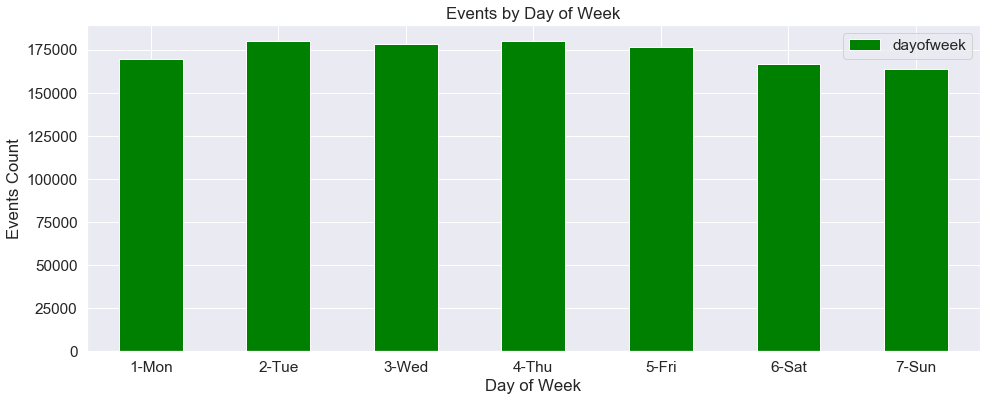

In [28]:
# We will now plot the distribution of events over different days of a week

dayofweek_counts = pd.DataFrame(df_events.dayofweek.value_counts().sort_index())

dayofweek_counts.plot(kind='bar', color='green', figsize=(16,6))
plt.title('Events by Day of Week');
plt.ylabel('Events Count');
plt.xlabel('Day of Week');
plt.xticks(rotation=0);
plt.show();
del dayofweek_counts

___We can see that the day of week event counts are fairly consistent without any significant vaiation.___

#### 5.	Plot a graph representing the distribution of events per hour

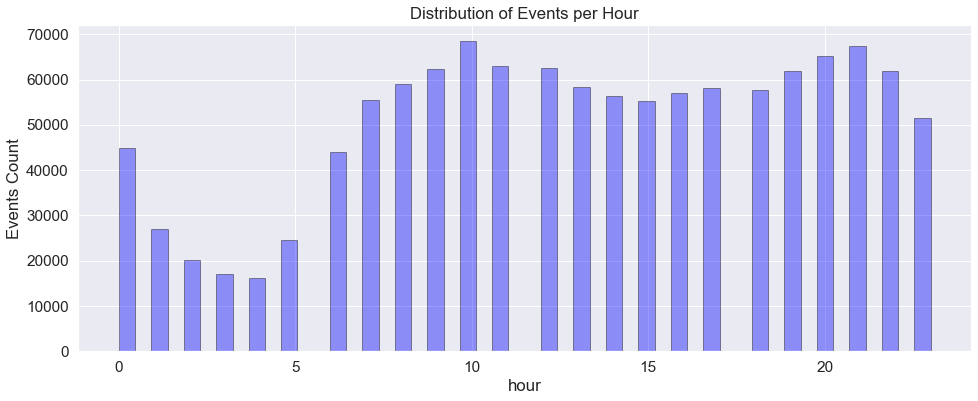

In [29]:
# We will plot the distribution of events per hour using the seaborn library

plt.figure(figsize=(16,6));
plt.title('Distribution of Events per Hour');
sns.distplot(df_events['hour'], hist=True, kde=False, color='blue', hist_kws={'edgecolor':'black'})
plt.ylabel('Events Count');
plt.show();

___From the Events per Hour distribution, we can see that the event counts are low from post midnight to early morning hours and pick up over the daytime peaking around 10 AM and 9 PM.___

#### 6. Plot the difference in the distribution of events per hour for Male and Female consumers

In [30]:
# We will first calculate the event counts per hour by gender

events_per_hour_by_gender = pd.DataFrame(df_events.groupby(['hour','gender'])['event_id'].count().reset_index())
events_per_hour_by_gender.rename(columns={'event_id': 'events_count'}, inplace=True)
events_per_hour_by_gender

,hour,gender,events_count
0,0.00,F,11004
1,0.00,M,33860
2,1.00,F,6693
3,1.00,M,20397
4,2.00,F,5241
5,2.00,M,15007
6,3.00,F,4424
7,3.00,M,12567
8,4.00,F,4561
9,4.00,M,11721


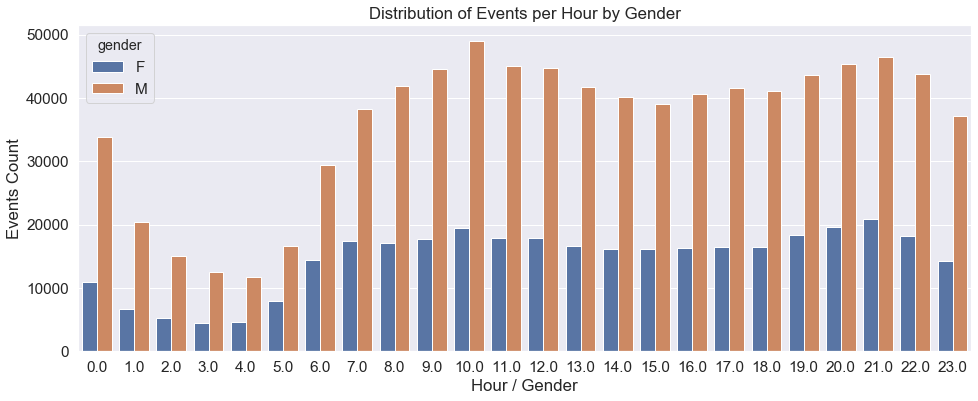

In [31]:
# And then plot them as a stacked bar chart using the seaborn library

plt.figure(figsize=(16,6));
sns.barplot(x='hour', y='events_count', data=events_per_hour_by_gender, hue='gender');
plt.title('Distribution of Events per Hour by Gender');
plt.ylabel('Events Count');
plt.xlabel('Hour / Gender');
plt.show();
del events_per_hour_by_gender

___From the Events per Hour by Gender distribution, we can see that the event counts are low from post midnight to early morning hours and pick up over the daytime peaking around 10 AM and 9 PM. Also the counts are significantly higher for Males compared to Females, which indicates that higher event averages could be good predictors for Male gender.___

#### 7.	Is there any difference in the distribution of Events for different Age Groups over different days of the week? [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]

In [32]:
# We will first bin the event_data dataset age column into the specified age groups using pd.cut

age_group_bins = [0, 24, 32, 45, 100]
age_group_labels = ['0-24', '25-32', '33-45', '46+']
df_events['age_group'] = pd.cut(df_events['age'], bins=age_group_bins, labels=age_group_labels)
display(df_events)
del age_group_bins, age_group_labels

,device_id,gender,age,event_id,event_time,longitude,latitude,hour,dayofweek,age_group
0,-1000369272589010000,F,26,NaN,NaT,nan,nan,nan,NaN,25-32
1,-1000572055892390000,F,27,NaN,NaT,nan,nan,nan,NaN,25-32
2,-1000643208750510000,M,29,NaN,NaT,nan,nan,nan,NaN,25-32
3,-1001337759327040000,M,30,2774404,2016-05-07 09:14:24,119.61,29.70,9.00,6-Sat,25-32
4,-1001337759327040000,M,30,3065018,2016-05-04 10:26:14,120.29,30.42,10.00,3-Wed,25-32
...,...,...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,839154,2016-05-07 08:33:32,nan,nan,8.00,6-Sat,33-45
1266929,99976251796408100,M,43,2642482,2016-05-07 08:25:59,nan,nan,8.00,6-Sat,33-45
1266930,99976251796408100,M,43,2642573,2016-05-07 08:32:57,nan,nan,8.00,6-Sat,33-45
1266931,999861742187156000,M,27,NaN,NaT,nan,nan,nan,NaN,25-32


In [33]:
# We will then calculate the event counts per dayofweek by agegroup

events_per_dayofweek_by_agegroup = pd.DataFrame(df_events.groupby(['dayofweek','age_group'])['event_id'].count().reset_index())
events_per_dayofweek_by_agegroup.rename(columns={'event_id': 'events_count'}, inplace=True)
events_per_dayofweek_by_agegroup

,dayofweek,age_group,events_count
0,1-Mon,0-24,27123
1,1-Mon,25-32,65877
2,1-Mon,33-45,55232
3,1-Mon,46+,21149
4,2-Tue,0-24,26144
5,2-Tue,25-32,71487
6,2-Tue,33-45,59882
7,2-Tue,46+,22783
8,3-Wed,0-24,27114
9,3-Wed,25-32,69098


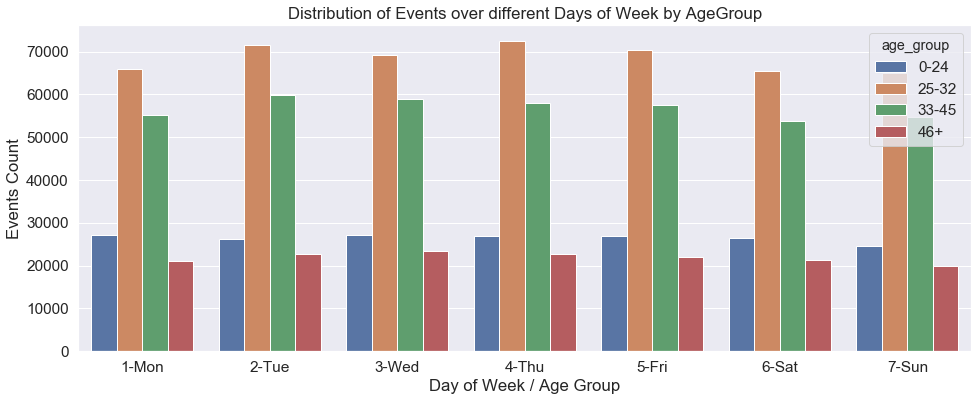

In [34]:
# And then plot them as a stacked bar chart using the seaborn library

plt.figure(figsize=(16,6));
sns.barplot(x='dayofweek', y='events_count', data=events_per_dayofweek_by_agegroup, hue='age_group');
plt.title('Distribution of Events over different Days of Week by AgeGroup');
plt.ylabel('Events Count');
plt.xlabel('Day of Week / Age Group');
plt.show();
del events_per_dayofweek_by_agegroup

___From the Events per Days of Week by Age Group distribution, we do not see any significant variation within each Age Group in terms of events count across the different Days of Week. We can also see that the event counts are low for the 0-24 and 46+ age groups as can be expected. This indicates that higher event averages could be good predictors for the middle Age Groups.___

#### 8.	Stacked bar chart for the top 10 mobile brands across male and female consumers

In [35]:
# We will first extract the top 10 mobile brands from the device_brand dataset

top_10_df = df_device_brand['phone_brand'].value_counts()[:10]
top_10_df

Xiaomi     17299
samsung    13669
Huawei     12960
OPPO        5783
vivo        5637
Meizu       4699
Coolpad     3339
lenovo      2691
Gionee      1123
HTC         1013
Name: phone_brand, dtype: int64

In [36]:
# We will then calculate the gender split counts for these top 10 mobile brands

top_10_df = df_device_brand[df_device_brand.phone_brand.isin(top_10_df.index)][['phone_brand','gender','age']]
top_10_df = pd.DataFrame(top_10_df.groupby(['phone_brand','gender'])['age'].count().reset_index())
top_10_df.rename(columns={'age': 'brand_count'}, inplace=True)
top_10_df

,phone_brand,gender,brand_count
0,Coolpad,F,1079
1,Coolpad,M,2260
2,Gionee,F,402
3,Gionee,M,721
4,HTC,F,320
5,HTC,M,693
6,Huawei,F,4244
7,Huawei,M,8716
8,Meizu,F,1302
9,Meizu,M,3397


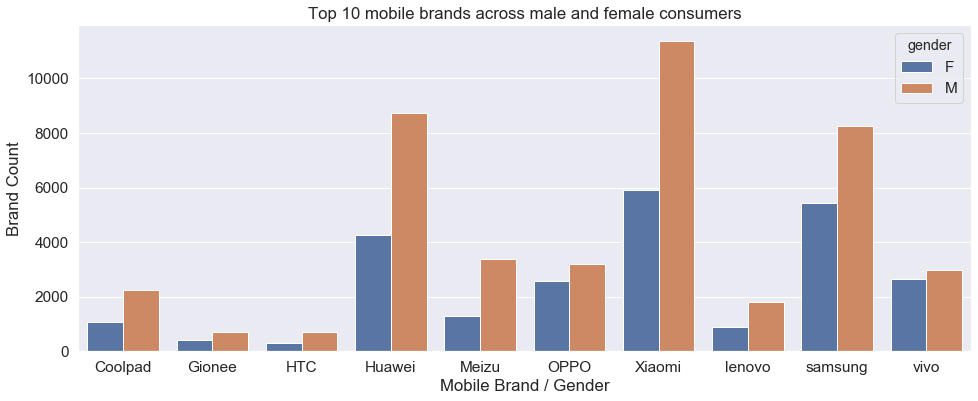

In [37]:
# And then plot them as a stacked bar chart using the seaborn library

plt.figure(figsize=(16,6));
sns.barplot(x='phone_brand', y='brand_count', data=top_10_df, hue='gender');
plt.title('Top 10 mobile brands across male and female consumers');
plt.ylabel('Brand Count');
plt.xlabel('Mobile Brand / Gender');
plt.show();
del top_10_df

___We can see that most of the top brands have a roughly 1:2 Female-to-Male ratio, with the exception of 'OPPP' and 'vivo' brands which have an almost balanced gender ratio.___

#### 9.	Prepare a chart representing the ten frequently used applications and their respective male and female percentage

In [38]:
# We will first extract the top 10 app_id's from the app_data dataset

top_10_df = df_app_data.app_id.value_counts()[:10]
top_10_df

4348659952760821294     3656664
8693964245073640147     2165530
5927333115845830913     1693405
33792862810792679       1435360
628020936226491308      1434108
-653184325026622087     1243296
-5839858269967688123    1161432
3683147815759994238      986470
4244331088397413857      925793
5729517255058371973      916992
Name: app_id, dtype: int64

In [39]:
# We will then get the event_id's and category corresponding to these top 10 app_id's

top_10_df = df_app_data[df_app_data.app_id.isin(top_10_df.index)][['event_id','app_id','category']]
display(top_10_df)
top_10_df.info()

,event_id,app_id,category
1439248,87551,-5839858269967688123,Bank financing
1439249,87551,-5839858269967688123,fixed income
1439250,87551,-5839858269967688123,Liquid medium
1439251,87551,-5839858269967688123,Custom label
1439252,87551,-5839858269967688123,pursue
...,...,...,...
78675825,1380498,4348659952760821294,Low risk
78675826,1289228,4348659952760821294,Low risk
78675827,1305525,4348659952760821294,Low risk
78675828,1371421,4348659952760821294,Low risk


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15619050 entries, 1439248 to 78675829
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   event_id  object
 1   app_id    object
 2   category  object
dtypes: object(3)
memory usage: 476.7+ MB


In [40]:
# We can see there are multiple categories for same event_id + app_id combinations
# We will handle this by grouping the event_id + app_id columns and keeping the 'first' category from each group

top_10_df.drop_duplicates(subset=['event_id','app_id'], keep='first', inplace=True)
top_10_df

,event_id,app_id,category
1439248,87551,-5839858269967688123,Bank financing
1439257,79002,-5839858269967688123,Bank financing
1439266,63345,-5839858269967688123,Bank financing
1439275,126877,-5839858269967688123,Bank financing
1439284,110735,-5839858269967688123,Bank financing
...,...,...,...
67148859,1553900,8693964245073640147,IM
67148860,1511090,8693964245073640147,IM
67148861,1542986,8693964245073640147,IM
67148862,1511086,8693964245073640147,IM


In [41]:
# We will join the new dataset with the events dataset to get the corresponding gender info

top_10_df = pd.merge(top_10_df, df_events, how='inner', on='event_id'
                            )[['event_id', 'app_id', 'category', 'gender']]
top_10_df

,event_id,app_id,category,gender
0,87551,-5839858269967688123,Bank financing,M
1,87551,8693964245073640147,IM,M
2,79002,-5839858269967688123,Bank financing,M
3,79002,-653184325026622087,fixed income,M
4,79002,3683147815759994238,Custom label,M
...,...,...,...,...
1805584,1554439,8693964245073640147,IM,M
1805585,1577993,8693964245073640147,IM,M
1805586,1577992,8693964245073640147,IM,M
1805587,1542981,8693964245073640147,IM,M


In [42]:
# We will create a new column by combining the 'app_id' and 'category' columns and delete the individual columns

top_10_df['app_id_category'] = top_10_df['app_id'] + ' | ' + top_10_df['category']
top_10_df.drop(columns=['app_id','category'], inplace=True)
top_10_df

,event_id,gender,app_id_category
0,87551,M,-5839858269967688123 | Bank financing
1,87551,M,8693964245073640147 | IM
2,79002,M,-5839858269967688123 | Bank financing
3,79002,M,-653184325026622087 | fixed income
4,79002,M,3683147815759994238 | Custom label
...,...,...,...
1805584,1554439,M,8693964245073640147 | IM
1805585,1577993,M,8693964245073640147 | IM
1805586,1577992,M,8693964245073640147 | IM
1805587,1542981,M,8693964245073640147 | IM


In [43]:
# We will then calculate the gender split counts for these top 10 app_id_category

top_10_df = top_10_df.groupby('app_id_category')['gender'].value_counts().to_frame()
top_10_df = top_10_df.rename(columns={'gender':'gender_count'}).reset_index()
top_10_df

,app_id_category,gender,gender_count
0,-5839858269967688123 | Bank financing,M,49123
1,-5839858269967688123 | Bank financing,F,15401
2,-653184325026622087 | fixed income,M,51530
3,-653184325026622087 | fixed income,F,17542
4,33792862810792679 | Securities,M,53569
5,33792862810792679 | Securities,F,18199
6,3683147815759994238 | Custom label,M,71672
7,3683147815759994238 | Custom label,F,26975
8,4244331088397413857 | online malls,M,66273
9,4244331088397413857 | online malls,F,17890


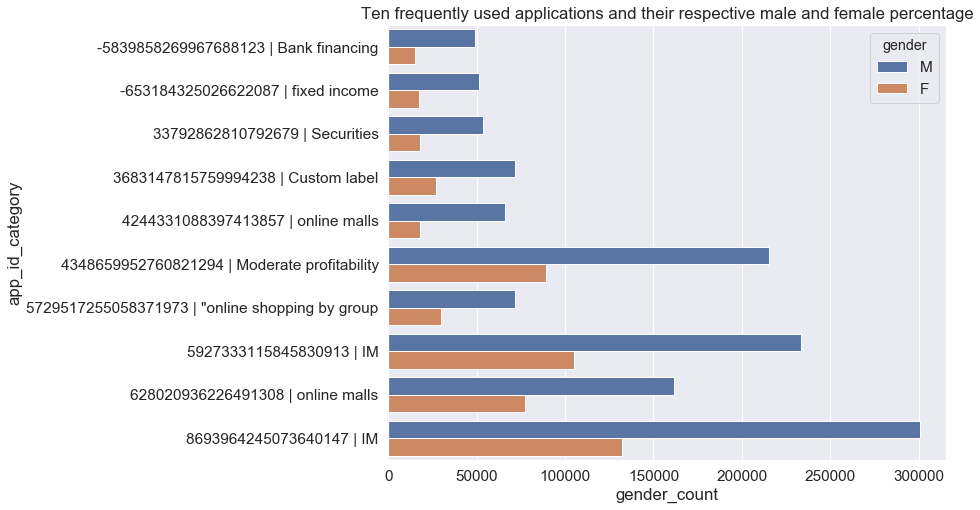

In [44]:
# And then plot them as a stacked bar chart using the seaborn library

plt.figure(figsize=(10,8));
sns.barplot(x='gender_count', y='app_id_category', data=top_10_df, hue='gender');
plt.title('Ten frequently used applications and their respective male and female percentage');
plt.show();
del top_10_df

#### 10. List the top 10 mobile phone brands bought by customers by age groups. [Consider the following age groups: 0–24, 25–32, 33–45, 46+]

In [45]:
# We will first bin the device_brand dataset age column into the specified age groups using pd.cut

age_group_bins = [0, 24, 32, 45, 100]
age_group_labels = ['0-24', '25-32', '33-45', '46+']
df_device_brand['age_group'] = pd.cut(df_device_brand['age'], bins=age_group_bins, labels=age_group_labels)
display(df_device_brand)
del age_group_bins, age_group_labels

,device_id,gender,age,phone_brand,device_model,age_group
0,-1819925713085810000,F,23,OPPO,N1 Mini,0-24
1,3670076507269740000,M,33,Meizu,menote1 2,33-45
2,5333872006968810000,M,34,Xiaomi,xnote,33-45
3,4216041491117040000,M,60,lshi,ihv1,46+
4,-3441149835823130000,M,30,Huawei,è£è€€ç•…çŽ©5X,25-32
...,...,...,...,...,...,...
74640,-4160161164750850000,M,60,Huawei,hu1,46+
74641,-3193846941368640000,M,40,OPPO,Find 7,33-45
74642,7976299855247220000,F,29,Huawei,B199,25-32
74643,-8665947049306800000,M,28,Xiaomi,MI 2S,25-32


In [46]:
# We will then extract the top 10 mobile brands for each age group

top_10_df = df_device_brand.groupby('age_group')['phone_brand'].value_counts().to_frame()
top_10_df = top_10_df.rename(columns={'phone_brand':'brand_count'}).reset_index()
top_10_df = top_10_df.groupby('age_group').head(10)
top_10_df

,age_group,phone_brand,brand_count
0,0-24,Xiaomi,4228
1,0-24,Huawei,2443
2,0-24,samsung,2359
3,0-24,vivo,1975
4,0-24,OPPO,1856
5,0-24,Meizu,1684
6,0-24,Coolpad,808
7,0-24,lenovo,612
8,0-24,Gionee,328
9,0-24,HTC,236


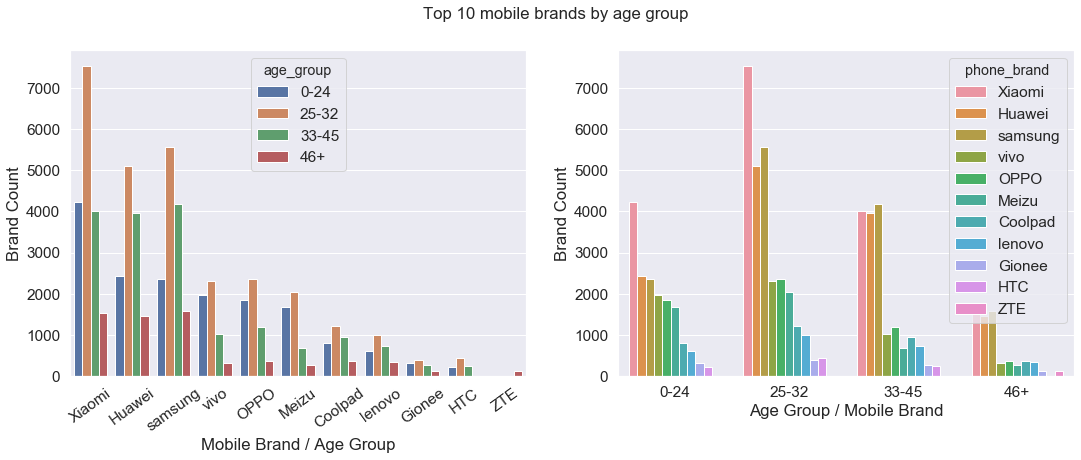

In [47]:
# And then plot them as a stacked bar chart using the seaborn library with two different views

plt.figure(figsize=(18,6));

plt.subplot(1,2,1);
sns.barplot(x='phone_brand', y='brand_count', data=top_10_df, hue='age_group');
plt.ylabel('Brand Count');
plt.xlabel('Mobile Brand / Age Group');
plt.xticks(rotation=36);

plt.subplot(1,2,2);
sns.barplot(x='age_group', y='brand_count', data=top_10_df, hue='phone_brand');
plt.ylabel('Brand Count');
plt.xlabel('Age Group / Mobile Brand');

plt.suptitle('Top 10 mobile brands by age group');
plt.show();
del top_10_df

___We can see that the same brands are popular across the age groups, with the exception of 'ZTE' brand as an outlier for the 46+ age group. This indicates that this specific mobile brand could be a good predictor for the 46+ age group.___

### Feature Engineering tasks

#### Feature Engineering on the [device_brand] dataset

In [48]:
# We will take a quick look at the device_brand dataset

df_device_brand

,device_id,gender,age,phone_brand,device_model,age_group
0,-1819925713085810000,F,23,OPPO,N1 Mini,0-24
1,3670076507269740000,M,33,Meizu,menote1 2,33-45
2,5333872006968810000,M,34,Xiaomi,xnote,33-45
3,4216041491117040000,M,60,lshi,ihv1,46+
4,-3441149835823130000,M,30,Huawei,è£è€€ç•…çŽ©5X,25-32
...,...,...,...,...,...,...
74640,-4160161164750850000,M,60,Huawei,hu1,46+
74641,-3193846941368640000,M,40,OPPO,Find 7,33-45
74642,7976299855247220000,F,29,Huawei,B199,25-32
74643,-8665947049306800000,M,28,Xiaomi,MI 2S,25-32


In [49]:
# We will check the cardinality of the phone_brand and device_model columns

all_brands_percentage = df_device_brand.phone_brand.value_counts(normalize=True) * 100.0
print('Cardinality of phone_brand =', all_brands_percentage.shape)

all_models_percentage = df_device_brand.device_model.value_counts(normalize=True) * 100.0
print('Cardinality of device_model =', all_models_percentage.shape)

Cardinality of phone_brand = (97,)
Cardinality of device_model = (1438,)


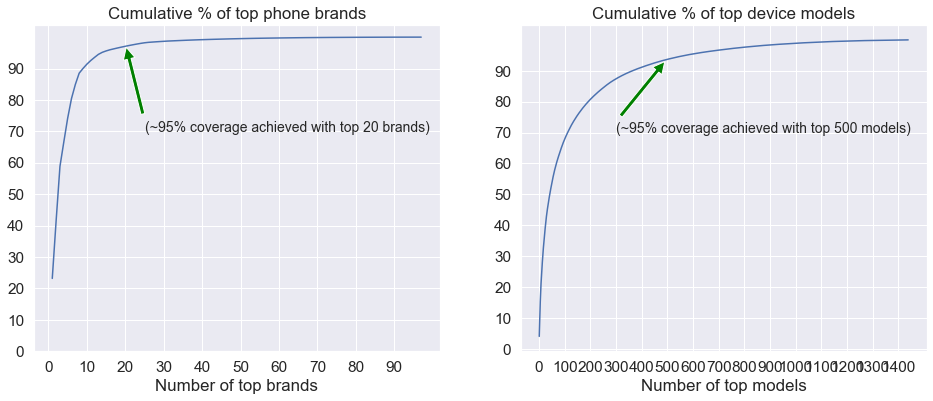

In [50]:
# We will plot the cumulative percentages of the phone_brand and device_model
# values to find out the cardinality points at which 95% of the counts get covered

plt.figure(figsize=(16,6));

plt.subplot(1,2,1);
all_brands_cumulative_percentage = all_brands_percentage.cumsum()
plt.plot(np.arange(all_brands_cumulative_percentage.shape[0])+1, all_brands_cumulative_percentage.values);
plt.yticks(np.arange(0, 100, step=10));
plt.xticks(np.arange(0, 100, step=10));
plt.annotate(s='(~95% coverage achieved with top 20 brands)', xy=(20.0,98.0), xytext=(25.0,70.0),
             arrowprops = dict(facecolor='green', shrink=0.05),)
plt.xlabel('Number of top brands');
plt.title('Cumulative % of top phone brands');

plt.subplot(1,2,2);
all_models_cumulative_percentage = all_models_percentage.cumsum()
plt.plot(np.arange(all_models_cumulative_percentage.shape[0])+1, all_models_cumulative_percentage.values);
plt.yticks(np.arange(0, 100, step=10));
plt.xticks(np.arange(0, 1450, step=100));
plt.annotate(s='(~95% coverage achieved with top 500 models)', xy=(500.0,94.0), xytext=(300.0,70.0),
             arrowprops = dict(facecolor='green', shrink=0.05),)

plt.xlabel('Number of top models');
plt.title('Cumulative % of top device models');

plt.show();
del all_brands_cumulative_percentage, all_models_cumulative_percentage

___We can see that the 95% coverage marks can be achieved using just the top 20 (out of 97) phone brands and top 500 (out of 1438) device models.___

In [51]:
%%time
# We will accordingly reduce the cardinality by mapping the low-count brands and models to a generic 'others' category

df_device_brand['phone_brand'] = df_device_brand['phone_brand'].apply(
                                    lambda x: x if x in (all_brands_percentage[:20].index) else 'others')
all_brands_percentage = df_device_brand.phone_brand.value_counts(normalize=True) * 100.0
print('Reduced cardinality of phone_brand =', all_brands_percentage.shape)

df_device_brand['device_model'] = df_device_brand['device_model'].apply(
                                    lambda x: x if x in (all_models_percentage[:500].index) else 'others')
all_models_percentage = df_device_brand.device_model.value_counts(normalize=True) * 100.0
print('Reduced cardinality of device_model =', all_models_percentage.shape)

del all_brands_percentage, all_models_percentage

Reduced cardinality of phone_brand = (21,)
Reduced cardinality of device_model = (501,)
Wall time: 17.8 s


In [52]:
# We will also drop the 4-binned 'age_group' column since there will be different age group bins in subsequent tasks

df_device_brand.drop(columns=['age_group'], inplace=True)
df_device_brand

,device_id,gender,age,phone_brand,device_model
0,-1819925713085810000,F,23,OPPO,N1 Mini
1,3670076507269740000,M,33,Meizu,menote1 2
2,5333872006968810000,M,34,Xiaomi,xnote
3,4216041491117040000,M,60,lshi,ihv1
4,-3441149835823130000,M,30,Huawei,è£è€€ç•…çŽ©5X
...,...,...,...,...,...
74640,-4160161164750850000,M,60,Huawei,hu1
74641,-3193846941368640000,M,40,OPPO,Find 7
74642,7976299855247220000,F,29,Huawei,B199
74643,-8665947049306800000,M,28,Xiaomi,MI 2S


#### Feature Engineering on the [event_data] dataset

In [53]:
# We will take a quick look at the event_data dataset

df_events

,device_id,gender,age,event_id,event_time,longitude,latitude,hour,dayofweek,age_group
0,-1000369272589010000,F,26,NaN,NaT,nan,nan,nan,NaN,25-32
1,-1000572055892390000,F,27,NaN,NaT,nan,nan,nan,NaN,25-32
2,-1000643208750510000,M,29,NaN,NaT,nan,nan,nan,NaN,25-32
3,-1001337759327040000,M,30,2774404,2016-05-07 09:14:24,119.61,29.70,9.00,6-Sat,25-32
4,-1001337759327040000,M,30,3065018,2016-05-04 10:26:14,120.29,30.42,10.00,3-Wed,25-32
...,...,...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,839154,2016-05-07 08:33:32,nan,nan,8.00,6-Sat,33-45
1266929,99976251796408100,M,43,2642482,2016-05-07 08:25:59,nan,nan,8.00,6-Sat,33-45
1266930,99976251796408100,M,43,2642573,2016-05-07 08:32:57,nan,nan,8.00,6-Sat,33-45
1266931,999861742187156000,M,27,NaN,NaT,nan,nan,nan,NaN,25-32


In [54]:
# We will re-bin the age column into 3 bins from 4 earlier as required for subsequent tasks

age_group_bins = [0, 24, 32, 100]
age_group_labels = ['0-24', '25-32', '32+']
df_events['age_group'] = pd.cut(df_events['age'], bins=age_group_bins, labels=age_group_labels)
display(df_events)
del age_group_bins, age_group_labels

,device_id,gender,age,event_id,event_time,longitude,latitude,hour,dayofweek,age_group
0,-1000369272589010000,F,26,NaN,NaT,nan,nan,nan,NaN,25-32
1,-1000572055892390000,F,27,NaN,NaT,nan,nan,nan,NaN,25-32
2,-1000643208750510000,M,29,NaN,NaT,nan,nan,nan,NaN,25-32
3,-1001337759327040000,M,30,2774404,2016-05-07 09:14:24,119.61,29.70,9.00,6-Sat,25-32
4,-1001337759327040000,M,30,3065018,2016-05-04 10:26:14,120.29,30.42,10.00,3-Wed,25-32
...,...,...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,839154,2016-05-07 08:33:32,nan,nan,8.00,6-Sat,32+
1266929,99976251796408100,M,43,2642482,2016-05-07 08:25:59,nan,nan,8.00,6-Sat,32+
1266930,99976251796408100,M,43,2642573,2016-05-07 08:32:57,nan,nan,8.00,6-Sat,32+
1266931,999861742187156000,M,27,NaN,NaT,nan,nan,nan,NaN,25-32


In [55]:
%%time
# We will create a feature called Average Events, which can give an estimate of how long the users' mobile phones are active

df_avg_events = pd.DataFrame(df_events.groupby('device_id')['event_id'].count().reset_index())
df_avg_events.rename(columns={'event_id': 'avg_events'}, inplace=True)
df_avg_events

Wall time: 264 ms


,device_id,avg_events
0,-1000369272589010000,0
1,-1000572055892390000,0
2,-1000643208750510000,0
3,-1001337759327040000,109
4,-1001949518704260000,0
...,...,...
74640,999356919477646000,0
74641,999529955917823000,0
74642,99976251796408100,3
74643,999861742187156000,0


In [56]:
# And then merge this back into the event_data dataset by joining on device_id

df_events = pd.merge(df_events, df_avg_events, how='left')
display(df_events)
del df_avg_events

,device_id,gender,age,event_id,event_time,longitude,latitude,hour,dayofweek,age_group,avg_events
0,-1000369272589010000,F,26,NaN,NaT,nan,nan,nan,NaN,25-32,0
1,-1000572055892390000,F,27,NaN,NaT,nan,nan,nan,NaN,25-32,0
2,-1000643208750510000,M,29,NaN,NaT,nan,nan,nan,NaN,25-32,0
3,-1001337759327040000,M,30,2774404,2016-05-07 09:14:24,119.61,29.70,9.00,6-Sat,25-32,109
4,-1001337759327040000,M,30,3065018,2016-05-04 10:26:14,120.29,30.42,10.00,3-Wed,25-32,109
...,...,...,...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,839154,2016-05-07 08:33:32,nan,nan,8.00,6-Sat,32+,3
1266929,99976251796408100,M,43,2642482,2016-05-07 08:25:59,nan,nan,8.00,6-Sat,32+,3
1266930,99976251796408100,M,43,2642573,2016-05-07 08:32:57,nan,nan,8.00,6-Sat,32+,3
1266931,999861742187156000,M,27,NaN,NaT,nan,nan,nan,NaN,25-32,0


#### Feature Engineering on the [app_data] dataset

In [57]:
# We will take a quick look at the app_data dataset

df_app_data

,event_id,app_id,is_active,category
0,3069897,-1000044012126765960,0,Casual puzzle categories
1,3069897,-1000044012126765960,0,Custom label
2,3069897,-1000044012126765960,0,game
3,3091131,-1000044012126765960,0,Casual puzzle categories
4,3091131,-1000044012126765960,0,Custom label
...,...,...,...,...
78844609,2309623,987379721203489605,0,pursue
78844610,2431318,987379721203489605,0,pursue
78844611,2284625,987379721203489605,0,pursue
78844612,211920,987379721203489605,0,pursue


In [58]:
%%time
# We will groupby the event_id and aggregate the 'is_active' counts and string-join the 'category' values

df_app_data = df_app_data.groupby('event_id')[['is_active','category']]\
                            .agg({'is_active':np.sum, 'category':" ".join}).reset_index()
df_app_data

Wall time: 52.2 s


,event_id,is_active,category
0,1000004,234.00,music Noble 1 Cozy 1 online malls Pursuit 1 1 reputation Custom label Services 1 Quality 1 pictu...
1,1000007,39.00,online malls fashion unknown unknown Property Industry 1.0 Industry tag video notes Personal Eff...
2,1000010,7.00,Services 1 news Industry tag Property Industry 2.0 Technology Information unknown unknown
3,1000012,209.00,Finance Custom label Wealth Management High risk Higher income DS_P2P net loan Liquid medium unk...
4,1000013,37.00,online malls fashion unknown music unknown Property Industry 1.0 Property Industry 1.0 Industry ...
...,...,...,...
556373,999971,3.00,Wealth Management unknown unknown
556374,999975,8.00,Cozy 1 Property Industry 1.0 Property Industry 1.0 Property Industry 2.0 Industry tag Industry t...
556375,999986,14.00,unknown picture sharing unknown Maternal and child population Pregnant baby unknown Prepare preg...
556376,999992,37.00,unknown picture sharing unknown Maternal and child population Pregnant baby unknown Prepare preg...


In [59]:
# We will define a custom function for text preprocessing and cleanup

import string
def clean_text_and_split(text):
    clean_text = [' ' if c in string.punctuation else c for c in text]
    clean_text = ''.join([c for c in clean_text if not c.isdigit()])
    clean_text =  [word.lower() for word in clean_text.split()]
    return set(clean_text)

In [60]:
%%time
# And apply the function on the 'category' column to convert the string values to a cleaned set of keywords

df_app_data['category'] = df_app_data['category'].apply(lambda x: clean_text_and_split(x))
df_app_data

Wall time: 4min 28s


,event_id,is_active,category
0,1000004,234.00,"{tourism, mobile, other, the, technology, free, income, channels, fashion, risk, loans, travel, ..."
1,1000007,39.00,"{payment, effectiveness, party, unknown, class, custom, film, internet, the, notes, cost, free, ..."
2,1000010,7.00,"{technology, property, industry, unknown, services, information, news, tag}"
3,1000012,209.00,"{effectiveness, relatives, securities, supermarket, mobile, unknown, wearable, custom, internet,..."
4,1000013,37.00,"{payment, relatives, party, cozy, unknown, custom, internet, the, free, high, platform, fashion,..."
...,...,...,...
556373,999971,3.00,"{wealth, unknown, management}"
556374,999975,8.00,"{free, property, industry, cozy, radio, tag}"
556375,999986,14.00,"{population, relatives, property, industry, child, prepare, unknown, picture, pregnant, maternal..."
556376,999992,37.00,"{label, relatives, unknown, pregnant, custom, internet, the, imf, income, baby, risk, population..."


In [61]:
%%time
# We will analyze the category_keywords from a subset of 1 lakh events

category_values = set()
for val in (df_app_data[:100000].category.values):
    if val is not np.nan:
        # Accumulate the category values into consolidated set
        category_values = category_values | val
        
print('Unique category keywords count from 1 lakh events =', len(category_values))
print('Unique category keywords from 1 lakh events =', category_values)
del category_values, val

Unique category keywords count from 1 lakh events = 475
Unique category keywords from 1 lakh events = {'express', 'editor', 'wars', 'asia', 'outlaws', 'other', 'ninja', 'flight', 'simulation', 'file', 'disk', 'chinese', 'animation', 'pet', 'tools', 'car', 'channels', 'collection', 'fashion', 'convenience', 'blogs', 'culture', 'office', 'group', 'foundation', 'vehicles', 'west', 'students', 'precious', 'behalf', 'supplies', 'beauty', 'travel', 'educational', 'health', 'slg', 'reputation', 'playing', 'church', 'rate', 'pictures', 'medical', 'calendar', 'train', 'puzzle', 'nature', 'accommodation', 'fun', 'total', 'heritage', 'buy', 'im', 'trust', 'education', 'horoscope', 'care', 'customization', 'snipe', 'class', 'dance', 'us', 'exercise', 'romance', 'trendy', 'xian', 'aggregate', 'poker', 'math', 'college', 'baby', 'takeaway', 'basketball', 'tank', 'hotels', 'yong', 'airlines', 'europe', 'radio', 'cutting', 'for', 'management', 'points', 'movie', 'rentals', 'table', 'competitive', 'hor

In [62]:
# We will define high-level "super_categories" based on above category keywords

super_categories = {
    'gaming': ['adventure', 'arpg', 'casual', 'chess', 'defense', 'gambling', 'game', 'games', 'gaming', 'lottery', 'military', 'millitary', 'parkour', 'playing', 'poker', 'puzzel', 'puzzle', 'racing', 'rpg', 'shooting', 'sports', 'strategy', 'tactics', 'war', 'warcraft', 'wars'],
    'financial': ['bank', 'banking', 'business', 'card', 'consumer', 'cost', 'credit', 'crowdfunding', 'debit', 'direct', 'estate', 'finance', 'financial', 'financing', 'free', 'fund', 'funds', 'futures', 'high', 'imf', 'income', 'industry', 'insurance', 'internet', 'liquid', 'liquidity', 'loan', 'low', 'medium', 'net', 'paid', 'pay', 'payment', 'pp', 'profitability', 'property', 'real', 'risk', 'securities', 'shares', 'stocks', 'total', 'trust', 'wealth'],
    'travel': ['air', 'airlines', 'aviation', 'booking', 'bus', 'europe', 'express', 'flight', 'hong', 'hotel', 'hotels', 'integrated', 'japan', 'japanese', 'kong', 'korea', 'macao', 'map', 'navigation', 'overseas', 'post', 'rail', 'states', 'taiwan', 'taxi', 'ticket', 'tourism', 'tourist', 'train', 'transport', 'travel', 'united', 'us'],
    'technology': ['accessories', 'appliances', 'digital', 'equipment', 'hardware', 'inches', 'installation', 'instruments', 'mobile', 'phone', 'science', 'screen', 'smart', 'system', 'technology', 'tools'],
    'family': ['behavior', 'care', 'classical', 'community', 'decoration', 'families', 'family', 'home', 'household', 'maternal', 'medical', 'mother', 'parenting', 'pregnant', 'raising', 'relatives'],
    'children' : ['animation', 'babies', 'baby', 'child', 'children', 'comic', 'comics'],
    'education' : ['audiobooks', 'books', 'education', 'educational', 'exams', 'information', 'library', 'management', 'math', 'news', 'read', 'reading', 'school', 'skills', 'study', 'training'],
    'lifestyle': ['art', 'arts', 'beauty', 'brand', 'car', 'center', 'collection', 'cool', 'culture', 'entertainment', 'fashion', 'film', 'food', 'free', 'fun', 'health', 'jewelry', 'music', 'nail', 'noble', 'pet', 'photography', 'preferences', 'products', 'shoes', 'shop', 'shopping', 'show', 'simple', 'spa', 'store', 'stores', 'style', 'supplies', 'teahouse', 'trendy', 'vitality'],
    'social': ['blogs', 'church', 'email', 'im', 'love', 'marriage', 'p2p', 'picture', 'sharing', 'video', 'wedding'],
    'services': ['domestic', 'effectiveness', 'personal', 'quality', 'reputation', 'service', 'services'],
    'others': ['custom', 'label', 'other', 'unknown']
}

In [63]:
%%time
# We will create new indicator columns based on the super_categories and map the 
# category column values to the respective columns, similar to one-hot-encoding

for super_category, keywords in super_categories.items():
    df_app_data[super_category] = df_app_data['category'].apply(
        lambda x: np.nan if x is np.nan else (1 if any(w in keywords for w in x) else 0))

display(df_app_data)
del super_category, keywords

,event_id,is_active,category,gaming,financial,travel,technology,family,children,education,lifestyle,social,services,others
0,1000004,234.00,"{tourism, mobile, other, the, technology, free, income, channels, fashion, risk, loans, travel, ...",0,1,1,1,1,1,1,1,1,1,1
1,1000007,39.00,"{payment, effectiveness, party, unknown, class, custom, film, internet, the, notes, cost, free, ...",0,1,0,0,0,0,0,1,1,1,1
2,1000010,7.00,"{technology, property, industry, unknown, services, information, news, tag}",0,1,0,1,0,0,1,0,0,1,1
3,1000012,209.00,"{effectiveness, relatives, securities, supermarket, mobile, unknown, wearable, custom, internet,...",0,1,0,1,1,0,1,1,1,1,1
4,1000013,37.00,"{payment, relatives, party, cozy, unknown, custom, internet, the, free, high, platform, fashion,...",0,1,0,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556373,999971,3.00,"{wealth, unknown, management}",0,1,0,0,0,0,1,0,0,0,1
556374,999975,8.00,"{free, property, industry, cozy, radio, tag}",0,1,0,0,0,0,0,1,0,0,0
556375,999986,14.00,"{population, relatives, property, industry, child, prepare, unknown, picture, pregnant, maternal...",0,1,0,0,1,1,0,0,1,0,1
556376,999992,37.00,"{label, relatives, unknown, pregnant, custom, internet, the, imf, income, baby, risk, population...",0,1,0,0,1,1,0,0,1,1,1


Wall time: 56.5 s


In [64]:
# We will discard the category column since the values are mapped or encoded to the super_category columns

df_app_data.drop(columns=['category'], inplace=True)
display(df_app_data)
df_app_data.info()

,event_id,is_active,gaming,financial,travel,technology,family,children,education,lifestyle,social,services,others
0,1000004,234.00,0,1,1,1,1,1,1,1,1,1,1
1,1000007,39.00,0,1,0,0,0,0,0,1,1,1,1
2,1000010,7.00,0,1,0,1,0,0,1,0,0,1,1
3,1000012,209.00,0,1,0,1,1,0,1,1,1,1,1
4,1000013,37.00,0,1,0,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556373,999971,3.00,0,1,0,0,0,0,1,0,0,0,1
556374,999975,8.00,0,1,0,0,0,0,0,1,0,0,0
556375,999986,14.00,0,1,0,0,1,1,0,0,1,0,1
556376,999992,37.00,0,1,0,0,1,1,0,0,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556378 entries, 0 to 556377
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   event_id    556378 non-null  object 
 1   is_active   556378 non-null  float64
 2   gaming      556378 non-null  int64  
 3   financial   556378 non-null  int64  
 4   travel      556378 non-null  int64  
 5   technology  556378 non-null  int64  
 6   family      556378 non-null  int64  
 7   children    556378 non-null  int64  
 8   education   556378 non-null  int64  
 9   lifestyle   556378 non-null  int64  
 10  social      556378 non-null  int64  
 11  services    556378 non-null  int64  
 12  others      556378 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 55.2+ MB


In [65]:
# We will check the summary stats for app_data dataset

df_app_data.describe()

,is_active,gaming,financial,travel,technology,family,children,education,lifestyle,social,services,others
count,556378.00,556378.00,556378.00,556378.00,556378.00,556378.00,556378.00,556378.00,556378.00,556378.00,556378.00,556378.00
mean,48.23,0.38,0.98,0.52,0.58,0.84,0.20,0.68,0.80,0.89,0.89,0.90
std,42.97,0.49,0.13,0.50,0.49,0.36,0.40,0.47,0.40,0.31,0.32,0.30
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,15.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00
50%,39.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
75%,68.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
max,594.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [66]:
# We will optimize the memory usage by downcasting the column dtypes to int8/int16 based on the min/max values

cols = list(super_categories.keys())
df_app_data['is_active'] = df_app_data['is_active'].astype(np.int16)
df_app_data[cols] = df_app_data[cols].astype(np.int8)
df_app_data.info()
del cols, super_categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556378 entries, 0 to 556377
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_id    556378 non-null  object
 1   is_active   556378 non-null  int16 
 2   gaming      556378 non-null  int8  
 3   financial   556378 non-null  int8  
 4   travel      556378 non-null  int8  
 5   technology  556378 non-null  int8  
 6   family      556378 non-null  int8  
 7   children    556378 non-null  int8  
 8   education   556378 non-null  int8  
 9   lifestyle   556378 non-null  int8  
 10  social      556378 non-null  int8  
 11  services    556378 non-null  int8  
 12  others      556378 non-null  int8  
dtypes: int16(1), int8(11), object(1)
memory usage: 11.1+ MB


***

## Subtask 4 - Advanced Visualization and Clustering

### Geospatial Visualization

#### Plot the visualization plot for a sample of 1 lakh data points

In [67]:
%%time
# We will extract a sample of 1 lakh data points from the event_data dataset

df_events_sample = df_events.dropna().sample(n=100000)[['gender', 'longitude', 'latitude', 'age_group']]
df_events_sample

Wall time: 692 ms


,gender,longitude,latitude,age_group
98485,M,113.43,36.71,32+
750112,M,113.40,28.21,25-32
388122,M,121.63,31.20,32+
937344,F,109.01,34.25,32+
176267,F,123.44,41.84,25-32
...,...,...,...,...
21911,F,120.59,30.30,25-32
696802,F,114.26,30.57,32+
682793,M,118.87,28.97,32+
810182,M,104.00,30.00,25-32


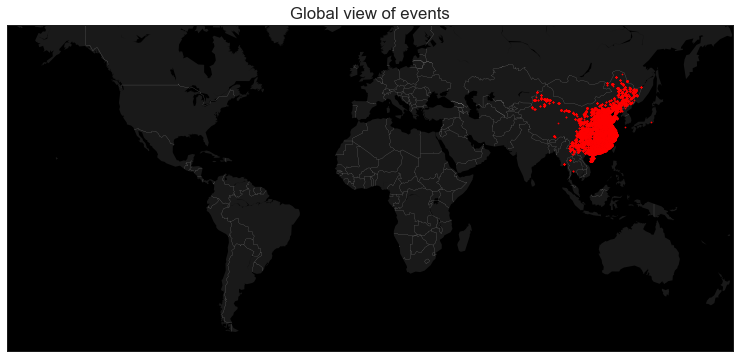

Wall time: 2.05 s


In [68]:
%%time
# And plot the visualization plot for these 1 lakh sample events

from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(16,6));
# Mercator of World
m1 = Basemap(projection='merc', resolution='c', lat_ts=0,
             llcrnrlat=-60, urcrnrlat=65, llcrnrlon=-180, urcrnrlon=180)

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color='w')              # thin white line for country borders

# Plot the data
mxy = m1(df_events_sample['longitude'].tolist(), df_events_sample['latitude'].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c='red', lw=0, alpha=1, zorder=5)

plt.title('Global view of events')
plt.show()

___From the global geospatial distribution, we can see that almost all the events are from the China region.<br>So for the subsequent visualization plots, we will zoom in to the China region bounded by the respective lat long min/max values.___

#### Compare the event visualization plots based on the users' gender information

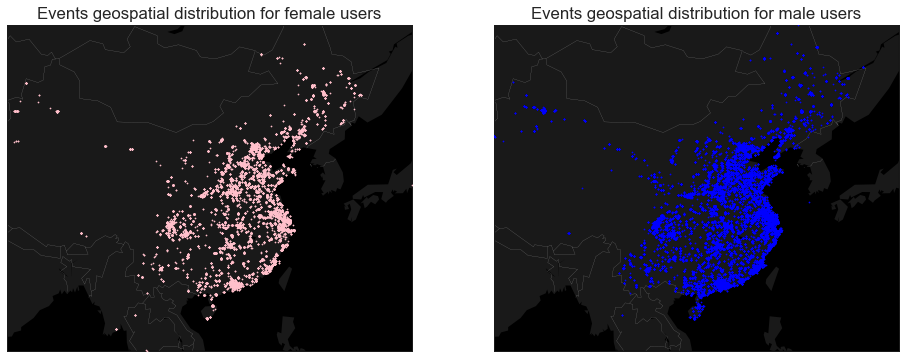

Wall time: 1.91 s


In [69]:
%%time
plt.figure(figsize=(16,6));

min_long, max_long = df_events_sample.longitude.min(), df_events_sample.longitude.max()
min_lat, max_lat = df_events_sample.latitude.min(), df_events_sample.latitude.max()
#--------------------------------------------------------------------------------------------
plt.subplot(1,2,1);
df_filtered = df_events_sample[df_events_sample.gender=='F']
m1 = Basemap(projection='merc', resolution='c', lat_ts=0,
             llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_long, urcrnrlon=max_long)

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color='w')              # thin white line for country borders

# Plot the data
mxy = m1(df_filtered['longitude'].tolist(), df_filtered['latitude'].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c='pink', lw=0, alpha=1, zorder=5)
plt.title('Events geospatial distribution for female users');
#--------------------------------------------------------------------------------------------
plt.subplot(1,2,2);
df_filtered = df_events_sample[df_events_sample.gender=='M']
m1 = Basemap(projection='merc', resolution='c', lat_ts=0,
             llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_long, urcrnrlon=max_long)

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color='w')              # thin white line for country borders

# Plot the data
mxy = m1(df_filtered['longitude'].tolist(), df_filtered['latitude'].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c='blue', lw=0, alpha=1, zorder=5)
plt.title('Events geospatial distribution for male users');

plt.show();

___We can see that the gender-wise events have a similar geospatial distribution.___

#### Compare the event visualization plots based on the following age groups: [0–24, 25–32, 32+]

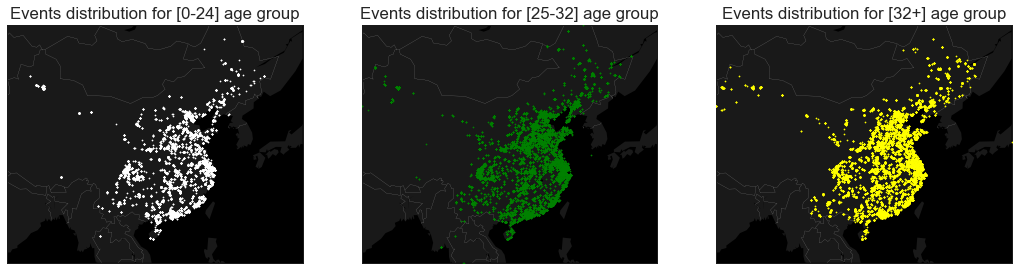

Wall time: 1.74 s


In [70]:
%%time
plt.figure(figsize=(18,6));

plt.subplot(1,3,1);
df_filtered = df_events_sample[df_events_sample.age_group=='0-24']
m1 = Basemap(projection='merc', resolution='c', lat_ts=0,
             llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_long, urcrnrlon=max_long)

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color='w')              # thin white line for country borders

# Plot the data
mxy = m1(df_filtered['longitude'].tolist(), df_filtered['latitude'].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c='white', lw=0, alpha=1, zorder=5)
plt.title('Events distribution for [0-24] age group');
#--------------------------------------------------------------------------------------------
plt.subplot(1,3,2);
df_filtered = df_events_sample[df_events_sample.age_group=='25-32']
m1 = Basemap(projection='merc', resolution='c', lat_ts=0,
             llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_long, urcrnrlon=max_long)

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color='w')              # thin white line for country borders

# Plot the data
mxy = m1(df_filtered['longitude'].tolist(), df_filtered['latitude'].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c='green', lw=0, alpha=1, zorder=5)
plt.title('Events distribution for [25-32] age group');
#--------------------------------------------------------------------------------------------
plt.subplot(1,3,3);
df_filtered = df_events_sample[df_events_sample.age_group=='32+']
m1 = Basemap(projection='merc', resolution='c', lat_ts=0,
             llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_long, urcrnrlon=max_long)

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color='w')              # thin white line for country borders

# Plot the data
mxy = m1(df_filtered['longitude'].tolist(), df_filtered['latitude'].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c='yellow', lw=0, alpha=1, zorder=5)
plt.title('Events distribution for [32+] age group');

plt.show();
del df_events_sample, df_filtered, m1, mxy

___We can see that the [0-24] and [25-32] age group events have a similar geospatial distribution, while the [32+] age group events have a more spread-out distribution at the outer geospatial regions. This indicates that any density-based clusters formed at the outer regions could be good predictors for the [32+] age group.___

### DBSCAN Clustering as a preprocessing technique

In [71]:
# Importing the required libraries

from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [72]:
%%time
# We will extract a smaller dataset from the event_data with just the non-null unique lat long values

df_lat_long = df_events.dropna()[['latitude', 'longitude']].drop_duplicates().reset_index()
df_lat_long.drop(columns=['index'], inplace=True)
df_lat_long

Wall time: 583 ms


,latitude,longitude
0,29.70,119.61
1,30.42,120.29
2,30.41,120.30
3,29.80,119.69
4,29.72,119.62
...,...,...
32659,41.78,123.49
32660,48.50,128.72
32661,48.50,128.71
32662,27.82,114.38


In [73]:
%%time
# We will fit a DBSCAN clustering using the 'ball_tree' algorithm with 'haversine' metric on the unique lat long dataset

kms_per_radian = 6371.0088
epsilon = 25.0/kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=25, algorithm='ball_tree', metric='haversine').fit(np.radians(df_lat_long.values))

Wall time: 7.45 s


In [74]:
# And get the cluster_labels for all the unique lat long values

cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
print('df_lat_long rows =', df_lat_long.shape[0])
print('cluster_labels len =', len(cluster_labels))
print('num_clusters =', num_clusters)

df_lat_long rows = 32664
cluster_labels len = 32664
num_clusters = 127


In [75]:
%%time
# We will convert the cluster_labels to a DataFrame and concat it back with the lat long dataset 

df_lat_long = pd.concat([df_lat_long, pd.DataFrame(cluster_labels,columns=['cluster_id'])], axis=1)
df_lat_long

Wall time: 3.01 ms


,latitude,longitude,cluster_id
0,29.70,119.61,0
1,30.42,120.29,0
2,30.41,120.30,0
3,29.80,119.69,0
4,29.72,119.62,0
...,...,...,...
32659,41.78,123.49,5
32660,48.50,128.72,-1
32661,48.50,128.71,-1
32662,27.82,114.38,39


In [76]:
%%time
# Finally we will merge the lat long dataset with newly generated cluster_id's back into the event_data dataset

df_events = pd.merge(df_events, df_lat_long, how='left')
df_events

Wall time: 1.17 s


,device_id,gender,age,event_id,event_time,longitude,latitude,hour,dayofweek,age_group,avg_events,cluster_id
0,-1000369272589010000,F,26,NaN,NaT,nan,nan,nan,NaN,25-32,0,nan
1,-1000572055892390000,F,27,NaN,NaT,nan,nan,nan,NaN,25-32,0,nan
2,-1000643208750510000,M,29,NaN,NaT,nan,nan,nan,NaN,25-32,0,nan
3,-1001337759327040000,M,30,2774404,2016-05-07 09:14:24,119.61,29.70,9.00,6-Sat,25-32,109,0.00
4,-1001337759327040000,M,30,3065018,2016-05-04 10:26:14,120.29,30.42,10.00,3-Wed,25-32,109,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,839154,2016-05-07 08:33:32,nan,nan,8.00,6-Sat,32+,3,nan
1266929,99976251796408100,M,43,2642482,2016-05-07 08:25:59,nan,nan,8.00,6-Sat,32+,3,nan
1266930,99976251796408100,M,43,2642573,2016-05-07 08:32:57,nan,nan,8.00,6-Sat,32+,3,nan
1266931,999861742187156000,M,27,NaN,NaT,nan,nan,nan,NaN,25-32,0,nan


In [77]:
# We will drop the 'event_time' (represented by hour & dayofweek), 'age_group' (existing 'age' column will be re-binned),
# and the 'longitude' and 'latitude' (represented by cluster_id) columns from the event_data dataset

df_events.drop(columns=['event_time', 'age_group', 'longitude', 'latitude'], inplace=True)
display(df_events)
del df_lat_long, cluster_labels, db, num_clusters

,device_id,gender,age,event_id,hour,dayofweek,avg_events,cluster_id
0,-1000369272589010000,F,26,NaN,nan,NaN,0,nan
1,-1000572055892390000,F,27,NaN,nan,NaN,0,nan
2,-1000643208750510000,M,29,NaN,nan,NaN,0,nan
3,-1001337759327040000,M,30,2774404,9.00,6-Sat,109,0.00
4,-1001337759327040000,M,30,3065018,10.00,3-Wed,109,0.00
...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,839154,8.00,6-Sat,3,nan
1266929,99976251796408100,M,43,2642482,8.00,6-Sat,3,nan
1266930,99976251796408100,M,43,2642573,8.00,6-Sat,3,nan
1266931,999861742187156000,M,27,NaN,nan,NaN,0,nan


In [78]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   device_id   1266933 non-null  object 
 1   gender      1266933 non-null  object 
 2   age         1266933 non-null  int8   
 3   event_id    1215598 non-null  object 
 4   hour        1215598 non-null  float64
 5   dayofweek   1215598 non-null  object 
 6   avg_events  1266933 non-null  int64  
 7   cluster_id  829077 non-null   float64
dtypes: float64(2), int64(1), int8(1), object(4)
memory usage: 78.5+ MB


### Final Data Preparation and Train-Test Splitting

In [79]:
%%time
# We will first merge the event_data and app_data datasets

df_master = pd.merge(df_events, df_app_data, how='left')
display(df_master)
df_master.info()
del df_events, df_app_data

,device_id,gender,age,event_id,hour,dayofweek,avg_events,cluster_id,is_active,gaming,financial,travel,technology,family,children,education,lifestyle,social,services,others
0,-1000369272589010000,F,26,NaN,nan,NaN,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,-1000572055892390000,F,27,NaN,nan,NaN,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,-1000643208750510000,M,29,NaN,nan,NaN,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,-1001337759327040000,M,30,2774404,9.00,6-Sat,109,0.00,21.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
4,-1001337759327040000,M,30,3065018,10.00,3-Wed,109,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,839154,8.00,6-Sat,3,nan,13.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
1266929,99976251796408100,M,43,2642482,8.00,6-Sat,3,nan,11.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
1266930,99976251796408100,M,43,2642573,8.00,6-Sat,3,nan,13.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
1266931,999861742187156000,M,27,NaN,nan,NaN,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266933 entries, 0 to 1266932
Data columns (total 20 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   device_id   1266933 non-null  object 
 1   gender      1266933 non-null  object 
 2   age         1266933 non-null  int8   
 3   event_id    1215598 non-null  object 
 4   hour        1215598 non-null  float64
 5   dayofweek   1215598 non-null  object 
 6   avg_events  1266933 non-null  int64  
 7   cluster_id  829077 non-null   float64
 8   is_active   556378 non-null   float64
 9   gaming      556378 non-null   float64
 10  financial   556378 non-null   float64
 11  travel      556378 non-null   float64
 12  technology  556378 non-null   float64
 13  family      556378 non-null   float64
 14  children    556378 non-null   float64
 15  education   556378 non-null   float64
 16  lifestyle   556378 non-null   float64
 17  social      556378 non-null   float64
 18  services    556378 non

In [80]:
%%time
# Next we will merge the master and device_brand datasets

df_master = pd.merge(df_master, df_device_brand, how='left')
display(df_master)
df_master.info()
del df_device_brand

,device_id,gender,age,event_id,hour,dayofweek,avg_events,cluster_id,is_active,gaming,...,technology,family,children,education,lifestyle,social,services,others,phone_brand,device_model
0,-1000369272589010000,F,26,NaN,nan,NaN,0,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,vivo,Y17T
1,-1000572055892390000,F,27,NaN,nan,NaN,0,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,OPPO,R819T
2,-1000643208750510000,M,29,NaN,nan,NaN,0,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,Gionee,GN137
3,-1001337759327040000,M,30,2774404,9.00,6-Sat,109,0.00,21.00,0.00,...,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,OPPO,A31
4,-1001337759327040000,M,30,3065018,10.00,3-Wed,109,0.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,OPPO,A31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,839154,8.00,6-Sat,3,nan,13.00,0.00,...,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,others,Touch 2
1266929,99976251796408100,M,43,2642482,8.00,6-Sat,3,nan,11.00,0.00,...,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,others,Touch 2
1266930,99976251796408100,M,43,2642573,8.00,6-Sat,3,nan,13.00,0.00,...,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,others,Touch 2
1266931,999861742187156000,M,27,NaN,nan,NaN,0,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,Xiaomi,MI 2S


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266933 entries, 0 to 1266932
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   device_id     1266933 non-null  object 
 1   gender        1266933 non-null  object 
 2   age           1266933 non-null  int8   
 3   event_id      1215598 non-null  object 
 4   hour          1215598 non-null  float64
 5   dayofweek     1215598 non-null  object 
 6   avg_events    1266933 non-null  int64  
 7   cluster_id    829077 non-null   float64
 8   is_active     556378 non-null   float64
 9   gaming        556378 non-null   float64
 10  financial     556378 non-null   float64
 11  travel        556378 non-null   float64
 12  technology    556378 non-null   float64
 13  family        556378 non-null   float64
 14  children      556378 non-null   float64
 15  education     556378 non-null   float64
 16  lifestyle     556378 non-null   float64
 17  social        556378 non-nu

In [81]:
%%time
# We will load top 10 rows and take a look at the Capstone project provided train_test_split

filename = 'D:/Prashant/Upgrad/Capstone/train_test_split.csv'
df_train_test_split = pd.read_csv(filename, nrows=10)
display(df_train_test_split)
df_train_test_split.info()

,device_id,gender,age,group,train_test_flag
0,-7548291590301750000,M,33,M32+,train
1,6943568600617760000,M,37,M32+,train
2,5441349705980020000,M,40,M32+,train
3,-5393876656119450000,M,33,M32+,train
4,4543988487649880000,M,53,M32+,train
5,-1819925713085810000,F,23,F0-24,train
6,3670076507269740000,M,33,M32+,train
7,3585775875204580000,F,51,F32+,train
8,7442042493953950000,M,26,M25-32,train
9,-1243925047576100000,F,37,F32+,train


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   device_id        10 non-null     int64 
 1   gender           10 non-null     object
 2   age              10 non-null     int64 
 3   group            10 non-null     object
 4   train_test_flag  10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes
Wall time: 35 ms


In [82]:
%%time
# Now we will read the entire dataset with the right column names and dtypes
# We wil also ignore the 'gender', 'age' and 'group' column since those are not required for the join with master dataset

df_train_test_split = pd.read_csv(filename,
        usecols=['device_id', 'train_test_flag'],
        dtype={'device_id':np.str, 'train_test_flag':np.str})

display(df_train_test_split)
df_train_test_split.info()

,device_id,train_test_flag
0,-7548291590301750000,train
1,6943568600617760000,train
2,5441349705980020000,train
3,-5393876656119450000,train
4,4543988487649880000,train
...,...,...
74640,-8270585312108800000,test
74641,9140950698473710000,test
74642,-5051737733034250000,test
74643,-6901678500015010000,test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   device_id        74645 non-null  object
 1   train_test_flag  74645 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
Wall time: 127 ms


In [83]:
%%time
# Next we will merge the master and train_test_split datasets

df_master = pd.merge(df_master, df_train_test_split, how='left')
display(df_master)
df_master.info()
del df_train_test_split

,device_id,gender,age,event_id,hour,dayofweek,avg_events,cluster_id,is_active,gaming,...,family,children,education,lifestyle,social,services,others,phone_brand,device_model,train_test_flag
0,-1000369272589010000,F,26,NaN,nan,NaN,0,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,vivo,Y17T,test
1,-1000572055892390000,F,27,NaN,nan,NaN,0,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,OPPO,R819T,train
2,-1000643208750510000,M,29,NaN,nan,NaN,0,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,Gionee,GN137,train
3,-1001337759327040000,M,30,2774404,9.00,6-Sat,109,0.00,21.00,0.00,...,1.00,0.00,1.00,1.00,1.00,1.00,1.00,OPPO,A31,train
4,-1001337759327040000,M,30,3065018,10.00,3-Wed,109,0.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,OPPO,A31,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,839154,8.00,6-Sat,3,nan,13.00,0.00,...,1.00,0.00,1.00,1.00,1.00,1.00,1.00,others,Touch 2,test
1266929,99976251796408100,M,43,2642482,8.00,6-Sat,3,nan,11.00,0.00,...,1.00,0.00,1.00,1.00,1.00,1.00,1.00,others,Touch 2,test
1266930,99976251796408100,M,43,2642573,8.00,6-Sat,3,nan,13.00,0.00,...,1.00,0.00,1.00,1.00,1.00,1.00,1.00,others,Touch 2,test
1266931,999861742187156000,M,27,NaN,nan,NaN,0,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,Xiaomi,MI 2S,train


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266933 entries, 0 to 1266932
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   device_id        1266933 non-null  object 
 1   gender           1266933 non-null  object 
 2   age              1266933 non-null  int8   
 3   event_id         1215598 non-null  object 
 4   hour             1215598 non-null  float64
 5   dayofweek        1215598 non-null  object 
 6   avg_events       1266933 non-null  int64  
 7   cluster_id       829077 non-null   float64
 8   is_active        556378 non-null   float64
 9   gaming           556378 non-null   float64
 10  financial        556378 non-null   float64
 11  travel           556378 non-null   float64
 12  technology       556378 non-null   float64
 13  family           556378 non-null   float64
 14  children         556378 non-null   float64
 15  education        556378 non-null   float64
 16  lifestyle        5

In [84]:
%%time
# Finally we will persist the master dataset to local storage for retrieval and processing in subsequent tasks

df_master.to_csv('df_master.csv', header=True, index=False)
del df_master

Wall time: 19.5 s


___With this we have reached the end of the Initial Subtasks stage. Dataset encoding and scenario 1/2 segmentation will be taken up in the next stage.___